<a href="https://colab.research.google.com/github/camilacrissiee/mcsem1d_/blob/main/Mcsem_knn_randomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Serão usados os modelos: Knn, Adaboost e Random Forest
O método de Random Forest é construído da mesma forma que algoritmos mais básicos, como regressão linear, árvore de decisão ou knn, por exemplo, mas possuem uma característica principal que os diferenciam, a combinação de diferentes modelos para se obter um único resultado.

In [5]:
!git clone https://github.com/camilacrissiee/mcsem1d_.git

Cloning into 'mcsem1d_'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [6]:
pip install lasio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.5 MB/s 


## Alocando e concatenando os dados

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from math import pi as PI
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import lasio

plt.style.use('ggplot')

In [8]:
modelo1 = pd.read_csv('mcsem1d_/train_h2000sed_0p25.csv') # complete
modelo2 = pd.read_csv('mcsem1d_/train_h2000sed_0p5.csv') # complete
modelo3 = pd.read_csv('mcsem1d_/train_h2000sed_0p75.csv') # complete
modelo4 = pd.read_csv('mcsem1d_/train_h2000sed_0p25_2.csv') # complete
modelo5 = pd.read_csv('mcsem1d_/train_h2000sed_0p5_2.csv') # complete
modelo6 = pd.read_csv('mcsem1d_/train_h2000sed_0p75_2.csv') # complete
modelo7 = pd.read_csv('mcsem1d_/train_h2000sed_0p25_5.csv') # complete
modelo8 = pd.read_csv('mcsem1d_/train_h2000sed_0p5_5.csv') # complete
modelo9 = pd.read_csv('mcsem1d_/train_h2000sed_0p75_5.csv') # complete
modelo10 = pd.read_csv('mcsem1d_/test_h2000sed_0p25_2.csv') # complete

In [9]:
#modelo_1 = modelo1.rename(columns = {'z':'z',	'ex_imag' :'ex_imag' ,	'ex_imag': 'ex_imag',	'rho' : 'rho'})

In [10]:
# Definindo as colunas de features

x1 = modelo1.iloc[:,[0,1,2,3,4]].values 
x2 = modelo2.iloc[:,[0,1,2,3,4]].values 
x3 = modelo3.iloc[:,[0,1,2,3,4]].values 
x4 = modelo4.iloc[:,[0,1,2,3,4]].values 
x5 = modelo5.iloc[:,[0,1,2,3,4]].values 
x6 = modelo6.iloc[:,[0,1,2,3,4]].values 
x7 = modelo7.iloc[:,[0,1,2,3,4]].values 
x8 = modelo8.iloc[:,[0,1,2,3,4]].values
x9 = modelo9.iloc[:,[0,1,2,3,4]].values 
x10 = modelo10.iloc[:,[0,1,2,3,4]].values 

In [11]:
# Definindo a coluna de target
y1 = modelo1.iloc[:,[5]].values 
y2 = modelo2.iloc[:,[5]].values 
y3 = modelo3.iloc[:,[5]].values 
y4 = modelo4.iloc[:,[5]].values 
y5 = modelo5.iloc[:,[5]].values 
y6 = modelo6.iloc[:,[5]].values 
y7 = modelo7.iloc[:,[5]].values 
y8 = modelo8.iloc[:,[5]].values
y9 = modelo9.iloc[:,[5]].values 
y10 = modelo10.iloc[:,[5]].values 

In [12]:
#PEGA 30% DE CADA MODELO PARA VALIDAR NO PRÓPRIO MODELO
# DE 9 MODELOS QUE FORAM USADOS PARA TRINAR E VALIDAR 

x1_train, x1_valid, y1_train, y1_valid = train_test_split(x1, y1, test_size=0.7)
x2_train, x2_valid, y2_train, y2_valid = train_test_split(x2, y2, test_size=0.7) 
x3_train, x3_valid, y3_train, y3_valid = train_test_split(x3, y3, test_size=0.7)
x4_train, x4_valid, y4_train, y4_valid = train_test_split(x4, y4, test_size=0.7)
x5_train, x5_valid, y5_train, y5_valid = train_test_split(x5, y5, test_size=0.7) 
x6_train, x6_valid, y6_train, y6_valid = train_test_split(x6, y6, test_size=0.7)
x7_train, x7_valid, y7_train, y7_valid = train_test_split(x7, y7, test_size=0.7) 
x8_train, x8_valid, y8_train, y8_valid = train_test_split(x8, y8, test_size=0.7)
x9_train, x9_valid, y9_train, y9_valid = train_test_split(x9, y9, test_size=0.7)

In [13]:
# CONCATENANDO OS DADOS DE REFERÊNCIA
# X_ref = concatenando as features
# Y_ref = concatenando o target
X_ref_train = np.concatenate((x1_train, x2_train,x3_train, x4_train, x5_train,x6_train, x7_train, x8_train, x9_train), axis = 0) 
X_ref_valid = x9_valid 

y_ref_train = np.concatenate((y1_train, y2_train,y3_train, y4_train, y5_train,y6_train, y7_train, y8_train,y9_train), axis = 0) 
y_ref_valid = y9_valid

## Escalonamento dos dados: Standard Scaler

Padroniza as features removendo a média e escala a variância a uma unidade. Isso significa que para cada feature, a média seria 0, e o Desvio Padrão seria 1. Desta forma, as features são padronizadas, tornando-as mais manejáveis para nossos modelos.

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scalerX = StandardScaler()
scalery = StandardScaler()
x_ref_train_sclnd = scalerX.fit_transform(X_ref_train) #Modelos concatenados de
                                  # referência para o treinamento, e agora com o pre processamento
x_ref_valid_sclnd = scalerX.transform(X_ref_valid) #Modelos concatenados de
                                  # referência para a validação, e agora com o pre processamento
x_test_sclnd = scalerX.transform(x10) # Modelo para testar, vamos fazer o teste no modelo 10

## KNN - Regressão

In [16]:
from sklearn.neighbors import KNeighborsRegressor
#{'metric': 'manhattan', 'n_neighbors': 55, 'weights': 'distance'}
neigh_model = KNeighborsRegressor(n_neighbors=10, weights='distance', metric='manhattan')
neigh_model.fit(X_ref_train, y_ref_train)

y_pred_valid_knnr = neigh_model.predict(X_ref_valid) 

y_pred_test_knnr = neigh_model.predict(x10)

##erro relativo

er_knnr = (y_pred_test_knnr - y10)/y10

In [17]:
x10[:,0]

array([1509.        , 1542.53333333, 1576.06666667, 1609.6       ,
       1643.13333333, 1676.66666667, 1710.2       , 1743.73333333,
       1777.26666667, 1810.8       , 1844.33333333, 1877.86666667,
       1911.4       , 1944.93333333, 1978.46666667, 2012.        ,
       2045.53333333, 2079.06666667, 2112.6       , 2146.13333333,
       2179.66666667, 2213.2       , 2246.73333333, 2280.26666667,
       2313.8       , 2347.33333333, 2380.86666667, 2414.4       ,
       2447.93333333, 2481.46666667, 2515.        , 2548.53333333,
       2582.06666667, 2615.6       , 2649.13333333, 2682.66666667,
       2716.2       , 2749.73333333, 2783.26666667, 2816.8       ,
       2850.33333333, 2883.86666667, 2917.4       , 2950.93333333,
       2984.46666667, 3018.        , 3051.53333333, 3085.06666667,
       3118.6       , 3152.13333333, 3185.66666667, 3219.2       ,
       3252.73333333, 3286.26666667, 3319.8       , 3353.33333333,
       3386.86666667, 3420.4       , 3453.93333333, 3487.46666

In [18]:
y10[:,0]

array([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2., 90., 90., 90.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.])

In [19]:
y_pred_valid_knnr

array([[37.02753955],
       [ 1.62300006],
       [ 1.        ],
       [ 1.6554078 ],
       [ 1.        ],
       [83.59141917],
       [ 2.97362961],
       [ 2.17957097],
       [80.        ],
       [ 2.        ],
       [ 2.        ],
       [ 2.        ],
       [ 1.98828138],
       [ 3.46567167],
       [ 3.09889894],
       [ 1.        ],
       [ 2.        ],
       [70.00804045],
       [25.05763535],
       [ 2.05312276],
       [ 1.63790694],
       [ 3.01041038],
       [ 2.66823097],
       [ 1.67728481],
       [83.64280704],
       [ 3.03726823],
       [ 2.        ],
       [ 2.52380952],
       [ 2.73882059],
       [ 1.90507817],
       [ 2.        ],
       [ 5.23898767],
       [ 1.        ],
       [ 1.        ],
       [ 2.        ],
       [ 2.25817801],
       [ 3.48903036],
       [ 1.76862252],
       [ 1.88791611],
       [ 2.57502686],
       [ 1.60646139],
       [ 3.13155928],
       [ 1.99280166],
       [ 1.61473094],
       [ 3.06118604],
       [ 1

In [20]:
y_pred_test_knnr

array([[ 2.18730674],
       [ 5.        ],
       [ 5.        ],
       [ 3.3468268 ],
       [ 1.        ],
       [ 3.24968324],
       [ 5.        ],
       [ 3.26724728],
       [ 1.        ],
       [ 2.        ],
       [ 2.09271855],
       [ 1.99298473],
       [ 1.91429972],
       [ 2.        ],
       [ 2.32541168],
       [65.06948068],
       [85.70589153],
       [80.26489273],
       [25.43362228],
       [ 5.        ],
       [ 5.        ],
       [ 4.36451014],
       [ 5.        ],
       [ 1.        ],
       [ 5.        ],
       [ 1.        ],
       [ 5.        ],
       [ 1.        ],
       [ 2.74338328],
       [ 5.        ],
       [ 1.99045474],
       [ 3.93051989],
       [ 5.        ],
       [ 2.6593057 ],
       [ 5.        ],
       [ 3.89137381],
       [ 5.        ],
       [ 1.        ],
       [ 5.        ],
       [ 3.71600532],
       [ 5.        ],
       [ 4.43217666],
       [ 5.        ],
       [ 4.48275862],
       [ 4.28244275],
       [ 5

## Random Forest - Regressão
No algoritmo RandomForest serão criadas várias árvores de decisão, sendo este conhecimento fundamental para o entendimento do algoritmo.
Árvores de Decisão (Decision Trees): As Árvores de Decisão estabelecem regras para tomada de decisão. O algoritmo criará uma estrutura similar a um fluxograma, com “nós” onde uma condição é verificada, e se atendida o fluxo segue por um ramo, caso contrário, por outro, sempre levando ao próximo nó, até a finalização da árvore. Com os dados de treino, o algoritmo busca as melhores condições, e onde inserir cada uma dentro do fluxo.

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [41]:
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)
regressor.fit(X_ref_train, y_ref_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(n_estimators=50, random_state=0)

In [42]:
X_ref_train = np.concatenate((x1_train, x2_train,x3_train, x4_train, x5_train,x6_train, x7_train, x8_train, x9_train), axis = 0) 
X_ref_valid = x9_valid 

y_ref_train = np.concatenate((y1_train, y2_train,y3_train, y4_train, y5_train,y6_train, y7_train, y8_train,y9_train), axis = 0) 
y_ref_valid = y9_valid

In [43]:
y_pred_valid_randon = regressor.predict(X_ref_valid) 

y_pred_test_randon = regressor.predict(x10)

##erro relativo

er_randon = (y_pred_test_knnr - y10)/y10

In [50]:
y_pred_test_randon

array([ 1.89333333,  4.45166667,  4.85      ,  2.59866667,  1.46566667,
        3.03066667,  4.76      ,  2.912     ,  1.23533333,  2.58666667,
        2.        ,  1.95666667,  1.505     ,  2.55333333,  3.358     ,
       79.08666667, 93.70333333, 85.83333333, 23.02333333,  6.04666667,
        4.46266667,  3.21333333,  3.696     ,  1.32      ,  3.4       ,
        2.36      ,  4.76      ,  1.53333333,  3.27066667,  4.84      ,
        2.36      ,  4.72      ,  4.83333333,  3.06133333,  4.68      ,
        5.        ,  4.2       ,  2.28      ,  4.01333333,  3.41266667,
        4.8       ,  4.92      ,  4.92      ,  5.        ,  5.        ,
        4.72      ,  2.93466667,  2.88133333,  2.98133333,  3.04133333,
        4.228     ,  3.8       ,  2.2       ,  3.88      ,  4.424     ,
        3.24495238,  1.75466667,  2.25333333,  4.73333333,  4.73333333,
        4.76      ,  4.92      ,  3.96      ,  3.96      ,  3.96      ,
        2.12      ])

In [44]:
#Verificando o modelo de teste (modelo 10)

#Mape
mape_randon = mean_absolute_percentage_error(y10, y_pred_test_randon)

#O erro quadrático médio para o modelo de teste
mse_randon = mean_squared_error(y10, y_pred_test_randon, squared= True)

# R2
r2_randon = r2_score(y10, y_pred_test_randon)

## Analisando o erro

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
import plotly.graph_objects as go

In [ ]:
#Verificando o modelo de teste (modelo 10)

#Mape
mape_knnr = mean_absolute_percentage_error(y10, y_pred_test_knnr)

#O erro quadrático médio para o modelo de teste
mse_knnr = mean_squared_error(y10, y_pred_test_knnr, squared= True)

# R2
r2_knnr = r2_score(y10, y_pred_test_knnr)

In [ ]:
fig = go.Figure(data=[go.Table(header=dict(values=['Métricas','Knnr - Dado observado','Randon - Dado observado'],
                                         align=['center','center'],
                                         font=dict(size=14)),
                cells=dict(values=[['MAPE','MSE','R2 Score'],
                           ["{:.5f}".format(mape_knnr),"{:.5f}".format(mse_knnr), "{:.5f}".format(r2_knnr)],
                           ["{:.5f}".format(mape_randon),"{:.5f}".format(mse_randon), "{:.5f}".format(r2_randon)],],)),])
                
fig.show()

## Gráfico

Text(0, 0.5, 'z (m)')

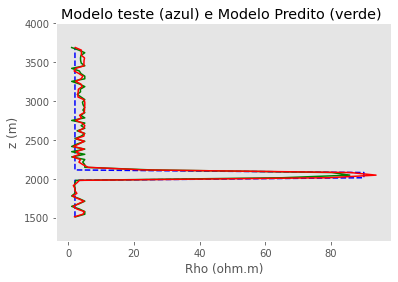

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.grid()
plt.plot(y10, x10, 'b--', y_pred_test_knnr, x10[:,0], 'g-', y_pred_test_randon, x10[:,0], 'r-')
plt.ylim(1200, 4000)
plt.title('Modelo teste (azul) e Modelo Predito (verde) ')
plt.xlabel('Rho (ohm.m)')
plt.ylabel('z (m)')
#plt.scatter(y10, x10, label = "Teste", color = "b", marker = "-", y_pred_test_knnr, x10[:,0], label = "Predito", color = "g", marker = "--" )
